# Intro to Numerical Computing

The focus of this lecture is on learning algorithms to solve typical problems in Physics and Astrophysics using Python. To start, we will look at how to use some of the libraries that will make this process easier, the ones you use the most will be Numpy, for arrays and matplotlib for plotting.

## Numpy

Numpy implements arrays that behave somewhat like Python lists but have some distinct differences

1. They are fixed size, ie you cannot append or delete elements.
2. Due to 1 as well as being based on optimized C/Fortran code, they are faster for most operations.
3. They implement the expected mathematical operations (behave like vectors/matrices).
4. They implement indexing for > 1D arrays in a logical way.

Lets explore how we make and manipulate numpy arrays

In [1]:
# import numpy as matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# A really simple array
array = np.zeros(3)
print(array)

[0. 0. 0.]


In [4]:
# A really simple 2D array
array_2d = np.ones((3, 3))
print(array_2d)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [11]:
# The 3D Identity Matrix
I = np.identity(3)
print(I)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [28]:
# Some arrays with various values
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 6, 7])

# Addition
print("Addition:", arr1 + arr2)

# Dot product
print("Dot product:", arr1.dot(arr2))
print("Dot Product:", arr1 @ arr2)

# Outer product
print("Outer Product:\n", np.outer(arr1, arr2))

# Transpose
print("Transpose of Outer Product:\n", np.outer(arr1, arr2).T)

Addition: [ 5  8 10]
Dot product: 37
Dot Product: 37
Outer Product:
 [[ 4  6  7]
 [ 8 12 14]
 [12 18 21]]
Transpose of Outer Product:
 [[ 4  8 12]
 [ 6 12 18]
 [ 7 14 21]]


You can also do lots of other stuff with these numpy arrays such as finding Eigenvalues and Eigenvectors, Solving lineatr equations etc.

### Exercise

Solve the system of equations $\mathcal{A} \vec x = \vec b$ using numpy where $\mathcal{A}$ and $\vec b$ are defined below.

In [59]:
A = np.array(
    [[0, 0, 1],
     [1, 1, 1],
     [4, 2, 1]]
)

b = np.array([6, 0, 0])

## Speeding Up Calculation with Numpy

Numpy is also useful because it can often speed up calculations which are otherwise slow in Python. In languages such as C, the compiler can often perform what is called vectorization, which is when a for loop where the $i+1-$th step does not depend on the $i-$th step can be "unrolled" and the processor can do more than one of the iterations at a time. However, since Python is interpreted it does not have the prior knowledge needed to do this, so for loops must run one iteration at a time.

To get around this, in some problems it is possible to write our own vector expression using numpy that may be much faster. First lets see how we can time our code to test this.

In [70]:
%%time
# ^ We can use this in a jupyter notebook which is quite convenient

N = 1000000
lst = [i for i in range(N)]

for i in range(N):
    lst[i] = lst[i]**3 + 5.5 * lst[i]**2

CPU times: user 2.31 s, sys: 93.8 ms, total: 2.41 s
Wall time: 2.43 s


In [71]:
%%time

arr = np.arange(N)
arr = arr**3 + 5.5 * arr**2

CPU times: user 31.2 ms, sys: 31.2 ms, total: 62.5 ms
Wall time: 75.6 ms


In [74]:
np.all(arr == lst)

True

### Exercise

Below I have generated some fake data and the coefficients of a best fit line. Compute the following measure of error between the data and the line:

$$ \epsilon = \frac{\sum (y_i - y)^2}{N}$$

where $y_i$ is the $i-$th observed data point, $y = m x_i + b$ and $N$ is the number of points. Do the calculation using both a for loop and then with numpy arithmetic only and time each one.

In [91]:
m, b = 0.1, 1.8

N = 1000000
x = np.linspace(0, 100, N)
y = m * x + b + 0.1 * np.random.randn(N)

## Basic Plotting with Matplotlib

In it's most basic form, matplotlib takes an x array and a y array and plots them.

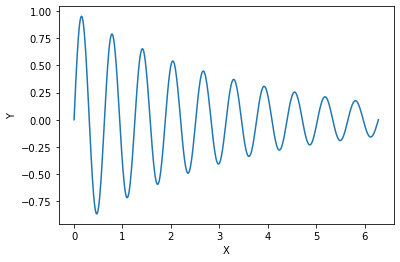

In [16]:
x = np.linspace(0, 2 * np.pi, 500)
y = np.exp(-0.3 * x) * np.sin(10 * x)

plt.plot(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

We can also create all sorts of more complicated plots. Of course I can't show everything here, but here are some common things. See the matplotlib website for more.

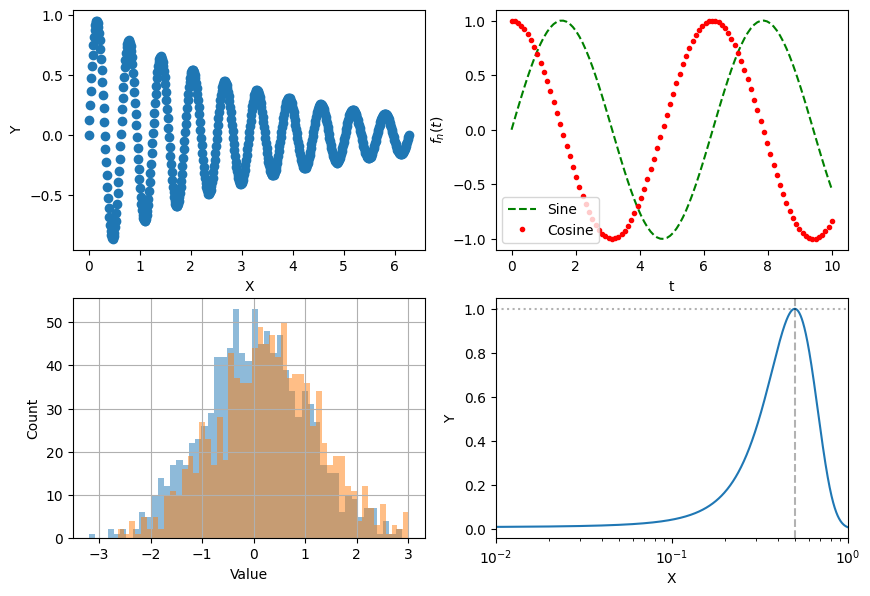

In [92]:
fig, ax = plt.subplots(2, 2, dpi=100, figsize=(10, 7))

x = np.linspace(0, 2 * np.pi, 500)
y = np.exp(-0.3 * x) * np.sin(10 * x)

ax[0,0].scatter(x, y)
ax[0,0].set_xlabel("X")
ax[0,0].set_ylabel("Y")

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

ax[0,1].plot(x, y1, 'g--', label="Sine")
ax[0,1].plot(x, y2, 'r.', label="Cosine")
ax[0,1].legend()
ax[0,1].set_xlabel("t")
ax[0,1].set_ylabel("$f_n(t)$")


data = np.random.randn(1000)
data2 = np.random.randn(1000) + 0.3
ax[1,0].grid()
ax[1,0].hist(data, bins=50, alpha=0.5)
ax[1,0].hist(data2, bins=50, alpha=0.5)
ax[1,0].set_xlabel("Value")
ax[1,0].set_ylabel("Count")

x = np.arange(0, 1, 0.001)
y = np.exp(-(x - 0.5)**2 / 0.05)
ax[1,1].semilogx(x, y)
ax[1,1].axvline(0.5, linestyle='--', color='k', alpha=0.3)
ax[1,1].axhline(1.0, linestyle=':', color='k', alpha=0.3)
ax[1,1].set_xlabel("X")
ax[1,1].set_ylabel("Y")
ax[1,1].set_xlim(0.01, 1)

plt.show()

## Plotting with Colormaps

Sometimes you want to show a 3rd dimension of the data on a 2D plot, for this we can use a colormap. Here a some simple examples.

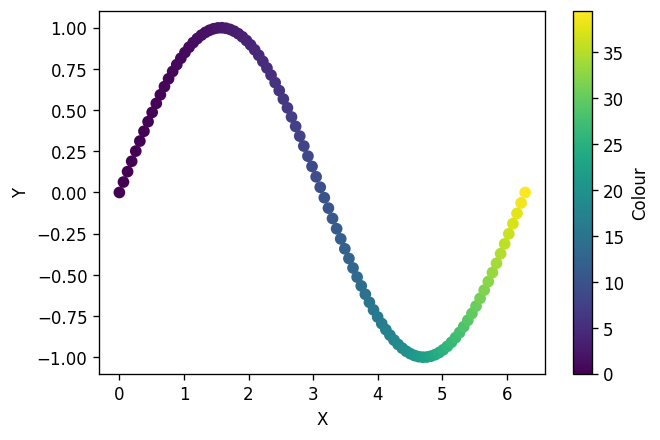

In [66]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
c = x**2

plt.figure(figsize=(6,4), dpi=120)
plt.scatter(x, y, c=c)
plt.colorbar(label="Colour")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

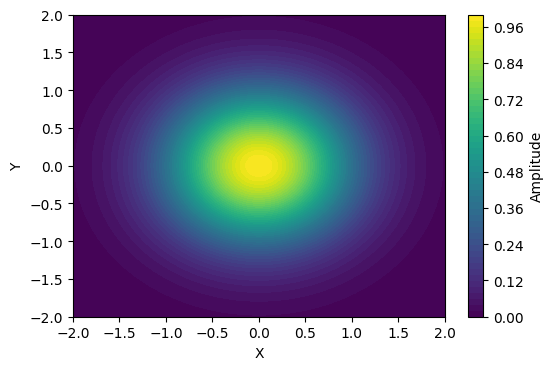

In [77]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

# Generate 2D mesh of coordinates
X, Y = np.meshgrid(x, y)

# 2D Gaussian on a mesh
U = np.exp(-(X**2 + Y**2))

plt.figure(dpi=100)
plt.contourf(X, Y, U, levels=50)
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label="Amplitude")
plt.show()

## Custom Plotting Functions

Often in research you may make the same plots over and over. Remembering DRY from Almog's lecture yesterday, let's build a custom plottin function which makes our "complicated" plot but has the same controls as the matplotlib builtin functions. It is actually quite simple to do!

In [88]:
def my_plot(x, y, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    
    ax.plot(x, y, linewidth=4, linestyle="--", **kwargs)
    
    return ax

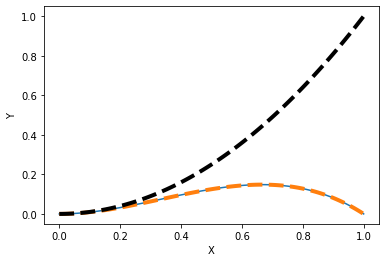

In [89]:
x = np.linspace(0, 1, 100)
y = x**2 - x**3

plt.plot(x, y)
my_plot(x, y)

y2 = x**2
my_plot(x, y2, color='k')

plt.xlabel("X")
plt.ylabel("Y")

plt.show()

## Working with Python - Notebook vs Scripts

Notebooks can be incredibly useful for trying stuff out and displaying visualizations. However, there are some problems that make them less ideal for larger development projects.

For starters, the run order of cells is not necessarily well defined, for example run the following two cells in order and it doesn't work, as we would expect from a Python script, however I can run the second cell first and it will work.

In [96]:
a = my_var

In [95]:
my_var = 10

There is also the issue that naviagating code in a single notebook can become difficult if you have hundreds or thousands of lines. The notebook is also slightly slower to run and leaving the kernel running for a long time and eat an increasingly large amount of memory since variables are often not garbage collected until the kernel actually stops.

I propose a middle ground which has worked well for my research and aleviates many of the problems. Start developping your code in a notebook and then as your codebase becomes larger, move your main work to functions and then put those functions in one or several .py files in the same directory as your notebook. You can then import those functions in the notebook and call them from there, keeping the plots and analysis code together.

Lets refactor the following example to use this method.

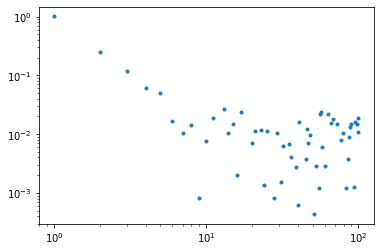

In [148]:
# Load the data
x, y = np.loadtxt("data.txt").T
plt.loglog(x, y, '.')

In [149]:
# Fit the data, taking only the first 5 for the fit.
x_five = x[:5]
y_five = y[:5]

# Fit a linear function in log space
x_log = np.log(x_five)
y_log = np.log(y_five)
m, b = np.polyfit(x_log, y_log, 1)
print(m, b)

-1.9099886066701202 -0.029696738194526905


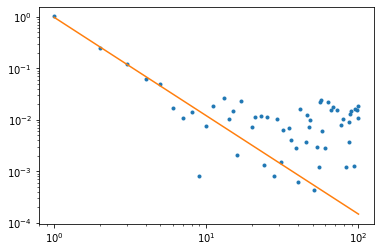

In [150]:
# Plot the data and best fit line
plt.loglog(x, y, '.')

x = np.linspace(1, 100, 100)
y = x**m * np.exp(b)

plt.loglog(x, y)